## IMDB Top 1000 Analysis

In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
# import data
df = pd.read_csv(r"C:\Users\Alexander\Documents\data_science_projects\movies_data\imdb_top_1000.csv")

In [3]:
# view the data
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
# check for missing data

for i in df.columns:
    missing = np.sum(df[i].isnull())
    print(f'{i}: {missing}')

Poster_Link: 0
Series_Title: 0
Released_Year: 0
Certificate: 101
Runtime: 0
Genre: 0
IMDB_Rating: 0
Overview: 0
Meta_score: 157
Director: 0
Star1: 0
Star2: 0
Star3: 0
Star4: 0
No_of_Votes: 0
Gross: 169


Certificate is not important for our analysis, that is okay if it is missing data. We will drop rows that have a missing Meta Score and then a Gross value.

In [7]:
# drop the values
df = df.dropna(subset = ['Meta_score', 'Gross'])

# check number of missing
for i in df.columns:
    missing = np.sum(df[i].isnull())
    print(f'{i}: {missing}')

Poster_Link: 0
Series_Title: 0
Released_Year: 0
Certificate: 36
Runtime: 0
Genre: 0
IMDB_Rating: 0
Overview: 0
Meta_score: 0
Director: 0
Star1: 0
Star2: 0
Star3: 0
Star4: 0
No_of_Votes: 0
Gross: 0


In [8]:
# check the data types
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

We will need to change a few columns. Released_Year, RunTime, and Gross will need to be converted to numerical columns.

We will note, Released Year has PG as an entered value. We will remove that first

In [13]:
# filter out movie with PG
df = df[df['Released_Year'] != 'PG']

# change released year
df['Released_Year'] = df['Released_Year'].astype('int64')

df['Released_Year'].unique()

array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2019, 2014, 1998, 1997, 1995, 1991, 1977,
       1954, 2011, 2006, 2000, 1988, 1985, 1968, 1960, 1942, 1936, 1931,
       2018, 2016, 2017, 2012, 2009, 1981, 1979, 1964, 2004, 1992, 1987,
       1986, 1984, 1983, 1976, 1973, 1971, 1965, 1962, 1959, 1958, 1952,
       1944, 1941, 1927, 2013, 2007, 2005, 1989, 1963, 1955, 1950, 1948,
       2015, 1996, 1982, 1978, 1967, 1951, 1949, 1940, 1939, 1934, 1970,
       1969, 1961, 1946, 1930, 1925, 1947, 1938, 1933, 1935, 1953],
      dtype=int64)

In [14]:
# we will note gross has , listed in the values
# we need to remove then convert to numerical

# replace commas
df['Gross'] = df["Gross"].str.replace(',', '')

# change gross
df['Gross'] = df['Gross'].astype('int64')

df['Gross'].unique()

array([ 28341469, 134966411, 534858444,  57300000,   4360000, 377845905,
       107928762,  96898818, 292576195,  37030102, 315544750, 330252182,
         6100000, 342551365, 171479930,  46836394, 290475067, 112000000,
        53367844, 188020017,   7563397,  10055859, 216540909, 136801374,
        57598247, 100125643, 130742922, 322740140,    269061, 335451311,
        13092000,  13182281,  53089891, 132384315,  32572577, 187705427,
         6719864,  23341568,  19501238, 422783777, 204843350,  11990401,
       210609762,   5321508,  32000000,   1024560,    163245,     19181,
         1661096,   5017246, 190241310, 858373000, 678815482, 209726015,
       162805434, 448139099,   6532908, 223808164,  11286112,    707481,
        25544867,   2375308, 248159971,  44017374,  83471511,  78900000,
          275902,  36764313, 159227644,    687185,   7098492,   6857096,
       120540719,  34400301,  33225499,  30328156,   3635482, 130096601,
       138433435,    933933, 191796233,  75600000, 

In [19]:
# let's extract the run time value and away from the min unit

# split the old column into two new columns
df[['length', 'unit']] = df['Runtime'].str.split(' ', expand=True)
df['length'] = df['length'].astype('int64')

df['length'].unique()

array([142, 175, 152, 202,  96, 201, 154, 195, 148, 139, 178, 161, 179,
       136, 146, 124, 133, 132, 169, 130, 125, 189, 116, 127, 118, 121,
       207, 122, 106, 112, 151, 150, 155, 119, 110,  88, 137, 165, 109,
       102,  87, 126, 117, 181, 149, 105, 164, 170,  98, 101, 113, 134,
       115, 147,  95, 123, 131, 153, 108, 104,  89,  81,  99, 160, 114,
       129, 228, 128, 103, 107, 140, 138, 180, 158, 156, 135,  86, 162,
        91, 172, 145, 196,  93, 120,  80, 111, 100, 141,  92, 224, 188,
        94, 183, 212, 238, 144, 143, 186,  83,  76,  90,  84, 191, 197,
       174,  75, 157, 209,  97,  82,  85, 168, 166, 192, 194, 159, 193,
        72, 163,  71,  78], dtype=int64)

We have cleaned up our data a bit. Let's take a look at our dataset by best rated movies

In [20]:
# sort by IMDB rating descending
df.sort_values(['IMDB_Rating'], ascending=False)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,length,unit
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,142,min
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,175,min
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,152,min
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,202,min
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,96,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,https://m.media-amazon.com/images/M/MV5BMjEzOT...,The Blind Side,2009,UA,129 min,"Biography, Drama, Sport",7.6,"The story of Michael Oher, a homeless and trau...",53.0,John Lee Hancock,Quinton Aaron,Sandra Bullock,Tim McGraw,Jae Head,293266,255959475,129,min
914,https://m.media-amazon.com/images/M/MV5BMTg0Nj...,Sherlock Holmes,2009,PG-13,128 min,"Action, Adventure, Mystery",7.6,Detective Sherlock Holmes and his stalwart par...,57.0,Guy Ritchie,Robert Downey Jr.,Jude Law,Rachel McAdams,Mark Strong,583158,209028679,128,min
912,https://m.media-amazon.com/images/M/MV5BMTU5MD...,Zombieland,2009,A,88 min,"Adventure, Comedy, Fantasy",7.6,A shy student trying to reach his family in Oh...,73.0,Ruben Fleischer,Jesse Eisenberg,Emma Stone,Woody Harrelson,Abigail Breslin,520041,75590286,88,min
911,https://m.media-amazon.com/images/M/MV5BYmFmNj...,La piel que habito,2011,R,120 min,"Drama, Horror, Thriller",7.6,"A brilliant plastic surgeon, haunted by past t...",70.0,Pedro Almodóvar,Antonio Banderas,Elena Anaya,Jan Cornet,Marisa Paredes,138959,3185812,120,min


#### Running the correlation

What are the most correlated variables to higher IMDB rating?

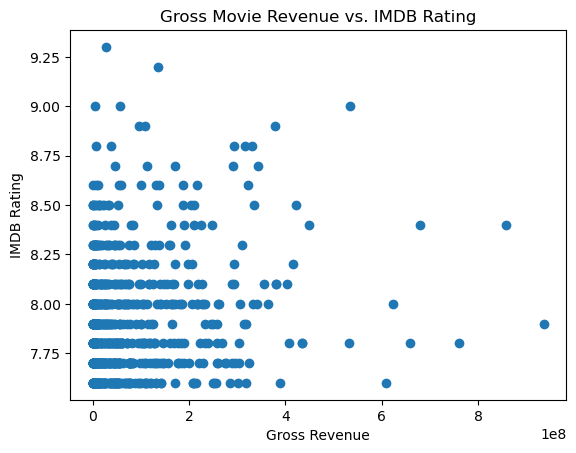

In [22]:
# first let's create a scatter plot of revenue and rating

plt.scatter(data = df, x='Gross', y='IMDB_Rating')
plt.title("Gross Movie Revenue vs. IMDB Rating")
plt.xlabel("Gross Revenue")
plt.ylabel("IMDB Rating")

plt.show()

It already seems that higher revenue grossing films are not necessarily higher rated.

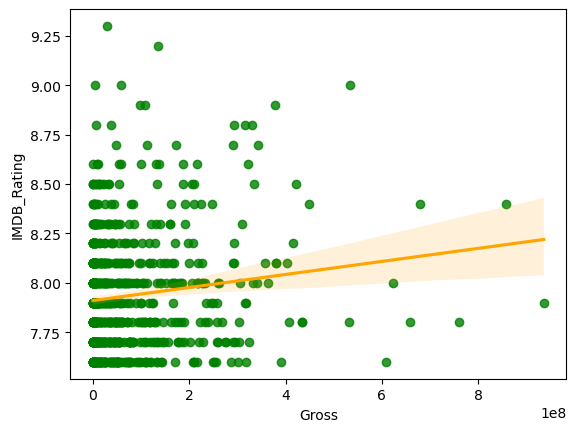

In [24]:
# let's find the actual correlation line

sns.regplot(data=df, x='Gross', y='IMDB_Rating',
            scatter_kws = {'color': "green"}, line_kws = {"color":"orange"})
plt.show()

The regplot line does seem to have a slight upwards trend. What is the scale of this relationship, such as the correlation?

In [30]:
# compute correlation for appropriate columns
df[['Gross', 'Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'length']].corr().round(2)

,Gross,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,length
Gross,1.00,0.24,0.13,-0.03,0.56,0.17
Released_Year,0.24,1.00,-0.18,-0.31,0.20,0.01
IMDB_Rating,0.13,-0.18,1.00,0.28,0.61,0.26
Meta_score,-0.03,-0.31,0.28,1.00,0.01,-0.01
No_of_Votes,0.56,0.20,0.61,0.01,1.00,0.22
length,0.17,0.01,0.26,-0.01,0.22,1.00


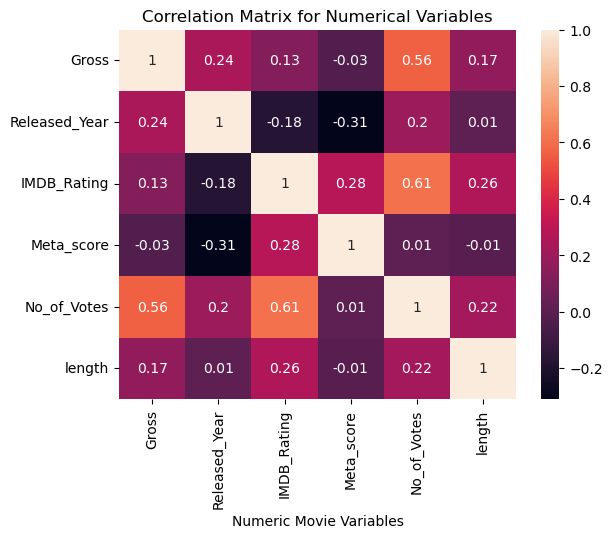

In [32]:
# let's create a visual to distinguish high correlation and low correlation

correlation_matrix = df[['Gross', 'Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'length']].corr().round(2)

# graph out
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numerical Variables")
plt.xlabel("Numeric Movie Variables")
plt.show()

In [38]:
# let's look at converting the object variables to numeric

df2 = df.drop(columns=['unit', 'Poster_Link'])

# convert categorical to numeric code
for i in df2.columns:
    if(df2[i].dtype == "object"):
        df2[i] = df2[i].astype('category')
        df2[i] = df2[i].cat.codes # convert each into a value

df2

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,length
0,660,1994,0,42,118,9.3,687,80.0,110,459,432,61,690,2343110,28341469,142
1,589,1972,0,72,106,9.2,347,100.0,106,324,4,250,155,1620367,134966411,175
2,573,2008,11,52,18,9.0,728,84.0,61,97,208,0,473,2303232,534858444,152
3,590,1974,0,89,106,9.0,605,90.0,106,6,491,521,155,1129952,57300000,202
4,1,1957,9,117,106,9.0,99,96.0,358,196,349,404,315,689845,4360000,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,229,1971,4,57,159,7.6,109,77.0,354,404,241,536,437,30144,696690,157
991,311,1970,3,44,39,7.6,83,50.0,44,103,568,153,105,45338,1378435,144
992,613,1967,9,100,60,7.6,369,65.0,415,378,531,389,88,166409,141843612,78
994,19,1964,9,108,100,7.6,551,96.0,320,256,465,201,567,40351,13780024,87


See how we have converted everything into a numeric value now. Numerical representation of the categories.

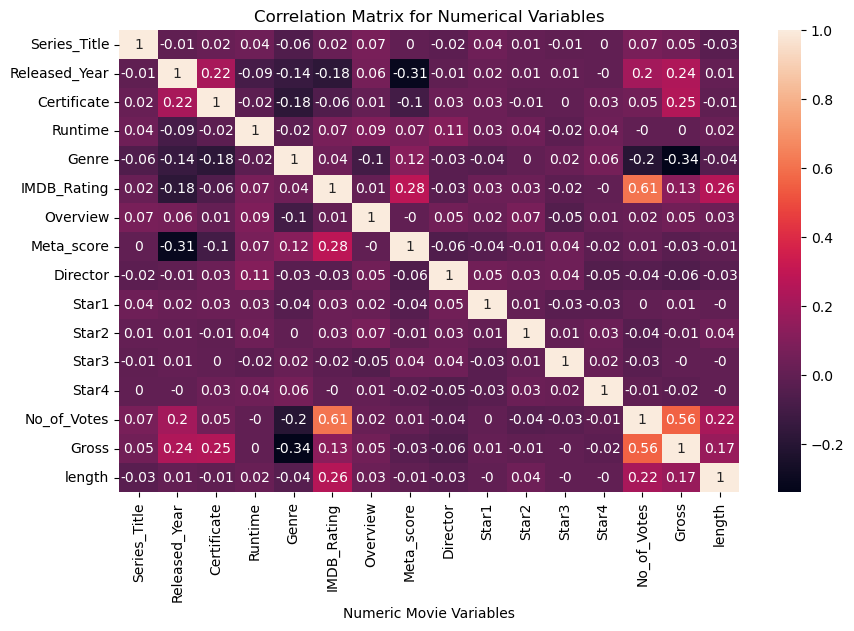

In [ ]:
# now we re-run the correlation matrix

correlation_matrix = df2.corr().round(2)

# graph out
plt.figure(figsize=(10,6)) # need to make the grid slightly larger so we can see the values
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numerical Variables")
plt.xlabel("Numeric Movie Variables")
plt.show()

To be honest, that did not provide much information. Likely because each of those categories are too small to establish a true relationship. We need much more data from other movies as well.

In [47]:
# create a small stack of the correlations
correlation_matrix_unstack = df2.corr()
corr_pairs = correlation_matrix_unstack.unstack()
print(corr_pairs.sort_values().to_string())

Gross          Genre           -0.341156
Genre          Gross           -0.341156
Meta_score     Released_Year   -0.306421
Released_Year  Meta_score      -0.306421
Genre          No_of_Votes     -0.200167
No_of_Votes    Genre           -0.200167
Certificate    Genre           -0.183487
Genre          Certificate     -0.183487
Released_Year  IMDB_Rating     -0.179065
IMDB_Rating    Released_Year   -0.179065
Genre          Released_Year   -0.143461
Released_Year  Genre           -0.143461
Certificate    Meta_score      -0.098029
Meta_score     Certificate     -0.098029
Overview       Genre           -0.095780
Genre          Overview        -0.095780
Runtime        Released_Year   -0.088507
Released_Year  Runtime         -0.088507
Director       Gross           -0.062680
Gross          Director        -0.062680
Director       Meta_score      -0.060837
Meta_score     Director        -0.060837
Certificate    IMDB_Rating     -0.059277
IMDB_Rating    Certificate     -0.059277
Genre          S

We see the highest correlation with IMDB Scores is the No_of_Votes variable. Let's test the significance of this correlation.

In [50]:
from scipy.stats.stats import pearsonr

C:\Users\Alexander\AppData\Local\Temp\ipykernel_51344\4005289447.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [51]:
# produce the statistic
pearsonr(df2['IMDB_Rating'], df['No_of_Votes'])

PearsonRResult(statistic=0.6143575751494785, pvalue=6.363381993626154e-79)

We see the p-value is extremely low, indicating a significant correlation between IMDB rating and the no of votes.